## Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing datasets

In [2]:
path="tips.csv"
df=pd.read_csv(path)

# Descriptive Statistics

In [3]:
# Preview data
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820
9,14.78,3.23,Male,No,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775


In [4]:
# Dataset dimensions - (rows, columns)
df.shape

(244, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [6]:
df.isnull().sum()
#finding if our data has null values or not

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

In [16]:
df = df.drop(columns=['price_per_person','CC Number'])

In [17]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Data Visualization

We will visualize correlation with heatmap, use count plots to see if the women or men come to the restaurant more than one another. Then let's see if the tip left really depends on the gender of the customer with box plot.

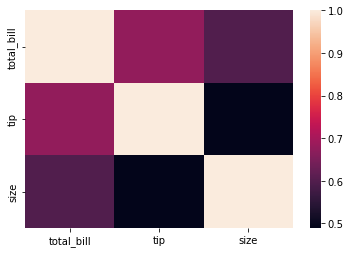

In [19]:
sns.heatmap(correlation)
plt.show()

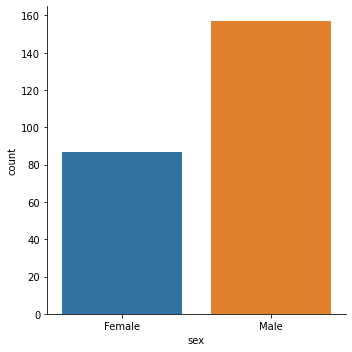

In [20]:
sns.catplot(x="sex",data=df,kind="count")
plt.show()

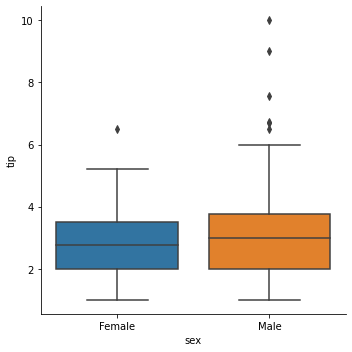

In [21]:
sns.catplot(x="sex",y="tip",data=df,kind="box")
plt.show()

Let's see how many days there are, then look at the relationship between the total bill paid and the tip, with respect to days.

In [22]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

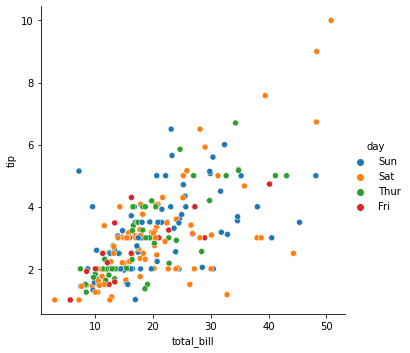

In [23]:
sns.relplot(x="total_bill",y="tip",data=df,kind="scatter",hue="day")
plt.show()

Let's see if people come over more in day time or in the evening.

<function matplotlib.pyplot.show(close=None, block=None)>

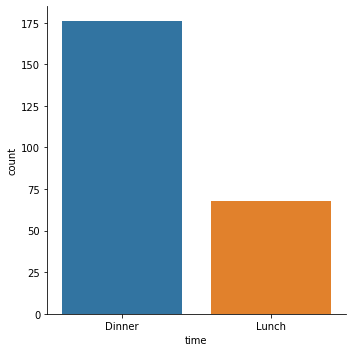

In [24]:
sns.catplot(x="time",data=df,kind="count")
plt.show

Let's see the correlation between the tip column with others.

In [25]:
df.corrwith(df["tip"])

total_bill    0.675734
tip           1.000000
size          0.489299
dtype: float64

## Preprocessing

We want to predict the tip from other columns, therefore, We
have to scale the numerical columns and encode categorical columns. For binary ones, you have to either use label encoding or one hot encode them, then drop duplicate ones.

In [26]:
columns_to_encode = ["sex","smoker","time"]
columns_to_scale = ["total_bill","tip","size"]

There are two unique values in sex, time and smoker columns and four values in day column, so we have to encode sex, time and smoker with label encoder and encode day with one hot encoder.

Now we are going to encode the day column with pandas' get_dummies method then directly append it to the main dataframe with pd.concat.

In [27]:
df = pd.concat([df, pd.get_dummies(df["day"],prefix="day")], axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Payer Name,Payment ID,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,Christy Cunningham,Sun2959,0,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,Douglas Tucker,Sun4608,0,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,Travis Walters,Sun4458,0,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,Nathaniel Harris,Sun5260,0,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,Tonya Carter,Sun2251,0,0,1,0


We will import Label Encoder from sklearn, instantiate it, and fit and transform the columns that We want to label, 
then convert the output array into dataframe and insert it to the original one.

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"]=pd.DataFrame(le.fit_transform(df["sex"]))

In [30]:
df["time"]=pd.DataFrame(le.fit_transform(df["time"]))
df["smoker"]=pd.DataFrame(le.fit_transform(df["smoker"]))

Now we will import MinMaxScaler to normalize the numerical columns, and put them in another dataframe called scaled_columns, then drop the original columns and append them to the original dataframe.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]),columns=columns_to_scale)
scaled_columns.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,0.350145,0.222031,0.313934
std,0.186477,0.153738,0.190220
min,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.200000
50%,0.308442,0.211111,0.200000
75%,0.441087,0.284722,0.400000
max,1.000000,1.000000,1.000000


In [32]:
df.drop(["total_bill","tip","size", "day"],axis=1,inplace=True)
df = pd.concat([df, scaled_columns], axis=1)

Let's see the last version of the dataframe. Everything should be numeric.

In [33]:
df.head()

,sex,smoker,time,Payer Name,Payment ID,day_Fri,day_Sat,day_Sun,day_Thur,total_bill,tip,size
0,0,0,0,Christy Cunningham,Sun2959,0,0,1,0,0.291579,0.001111,0.2
1,1,0,0,Douglas Tucker,Sun4608,0,0,1,0,0.152283,0.073333,0.4
2,1,0,0,Travis Walters,Sun4458,0,0,1,0,0.375786,0.277778,0.4
3,1,0,0,Nathaniel Harris,Sun5260,0,0,1,0,0.431713,0.256667,0.2
4,0,0,0,Tonya Carter,Sun2251,0,0,1,0,0.450775,0.290000,0.6


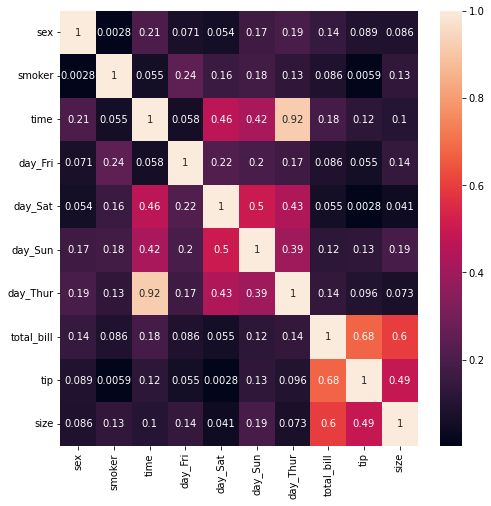

In [34]:
correlation = df.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()